In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_columns",500)
pd.set_option("max_rows",500)

In [5]:
DATA_DIR="../../Data/SEC-filings/data/"
TRAIN_DIR=DATA_DIR+"train/"
TEST_DIR=DATA_DIR+"test/"

def convert_to_list(fName):
	sentence=0
	df_list=[]
	with open(fName,"r") as f:
		for line in f:
			if line=="\n":
				sentence+=1
			else:
				df_list+=[[sentence]+line.strip().split(" ")]
	print(fName,sentence)
	return df_list



In [6]:
train_l=convert_to_list(TRAIN_DIR+"FIN5.txt")
test_l=convert_to_list(TEST_DIR+"FIN3.txt")

train=pd.DataFrame(train_l[1:],columns=["Sentence", "Word","POS","-","TAG"])
test=pd.DataFrame(test_l[1:],columns=["Sentence", "Word","POS","-","TAG"])

../../Data/SEC-filings/data/train/FIN5.txt 1169
../../Data/SEC-filings/data/test/FIN3.txt 306


In [7]:
train

,Sentence,Word,POS,-,TAG
0,1,This,DT,-,O
1,1,LOAN,NN,-,O
2,1,AND,CC,-,O
3,1,SECURITY,NNP,-,O
4,1,AGREEMENT,NNP,-,O
...,...,...,...,...,...
41009,1168,/,NN,-,O
41010,1168,s,NNS,-,O
41011,1168,/,:,-,O
41012,1168,Bing,VBG,-,I-PER


In [8]:
#for i in train:
#	col_len=len(train[i].value_counts())
#	if col_len < 50:
#		print(i)
#		print(train[i].value_counts())
#	else:
#		print(i, col_len)
#		print(train[i].value_counts()[:10])
#	print()

for i in train:
	print(i, len(train[i].value_counts()))
	print()


Sentence 1168

Word 3512

POS 42

- 2

TAG 5



In [16]:
sentences=train.groupby("Sentence").apply(lambda x: list(zip(x["Word"].values,x["POS"].values,x["TAG"].values))).values
sentences[0]

[('This', 'DT', 'O'),
 ('LOAN', 'NN', 'O'),
 ('AND', 'CC', 'O'),
 ('SECURITY', 'NNP', 'O'),
 ('AGREEMENT', 'NNP', 'O'),
 ('dated', 'VBD', 'O'),
 ('January', 'NNP', 'O'),
 ('27', 'CD', 'O'),
 (',', ',', 'O'),
 ('1999', 'CD', 'O'),
 (',', ',', 'O'),
 ('between', 'IN', 'O'),
 ('SILICON', 'NNP', 'I-ORG'),
 ('VALLEY', 'NNP', 'I-ORG'),
 ('BANK', 'NNP', 'I-ORG'),
 ('("', 'NNP', 'O'),
 ('Bank', 'NNP', 'I-ORG'),
 ('"),', ',', 'O'),
 ('a', 'DT', 'O'),
 ('California', 'NNP', 'I-LOC'),
 ('-', ':', 'O'),
 ('chartered', 'VBD', 'O'),
 ('bank', 'NN', 'I-ORG'),
 ('with', 'IN', 'O'),
 ('its', 'PRP$', 'O'),
 ('principal', 'JJ', 'O'),
 ('place', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('business', 'NN', 'O'),
 ('at', 'IN', 'O'),
 ('3003', 'CD', 'I-LOC'),
 ('Tasman', 'NNP', 'I-LOC'),
 ('Drive', 'NNP', 'I-LOC'),
 (',', ',', 'O'),
 ('Santa', 'NNP', 'I-LOC'),
 ('Clara', 'NNP', 'I-LOC'),
 (',', ',', 'O'),
 ('California', 'NNP', 'I-LOC'),
 ('95054', 'CD', 'O'),
 ('with', 'IN', 'O'),
 ('a', 'DT', 'O'),
 ('loan', 'NN', 

In [17]:
max(len(i) for i in sentences)

413

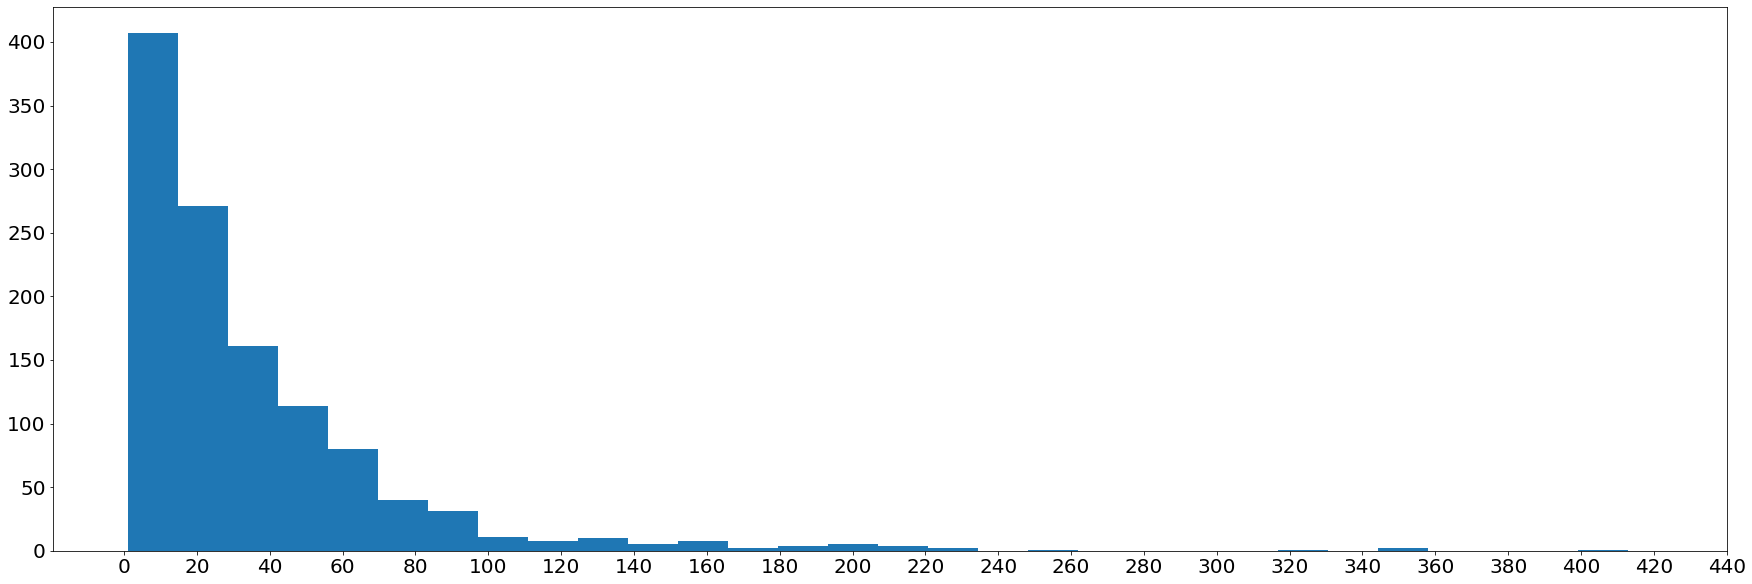

In [28]:
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.figure(figsize=(30,10))
plt.hist([len(i) for i in sentences],bins=30)
plt.xticks(range(0,450,20))
plt.show()

In [37]:
max(len(x) for x in train['Word'].unique())

41

In [43]:
def num_nulls(x,title="Title"):
	print(title)
	for i in x:
		print(x[i].isnull().value_counts())
		print()

num_nulls(train,"Train")
num_nulls(test,"Test")

Train
False    41014
Name: Sentence, dtype: int64

False    41014
Name: Word, dtype: int64

False    41014
Name: POS, dtype: int64

False    41014
Name: -, dtype: int64

False    41014
Name: TAG, dtype: int64

Test
False    13248
Name: Sentence, dtype: int64

False    13248
Name: Word, dtype: int64

False    13248
Name: POS, dtype: int64

False    13248
Name: -, dtype: int64

False    13248
Name: TAG, dtype: int64

